In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('mail_data.csv')

In [22]:
df.sample(5)

,Category,Message
2292,ham,Remind me how to get there and I shall do so
4451,ham,"Awesome, be there in a minute"
712,ham,It just seems like weird timing that the night...
1992,ham,No other Valentines huh? The proof is on your ...
1490,ham,Ok i juz receive..


In [23]:
df.shape

(5572, 2)

In [24]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
df.sample(5)

,Category,Message
2156,ham,What year. And how many miles.
5301,ham,At WHAT TIME should i come tomorrow
4240,ham,"Sez, hows u & de arab boy? Hope u r all good g..."
5102,spam,This msg is for your mobile content order It h...
402,ham,Dear how is chechi. Did you talk to her


In [27]:
# renaming the cols
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
523,ham,Were gonna go get some tacos
4791,ham,Yup. Izzit still raining heavily cos i'm in e ...
3992,ham,I am on the way to ur home
2136,ham,"Carlos took a while (again), we leave in a minute"
3915,ham,Today is ACCEPT DAY..U Accept me as? Brother S...


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
df['target'] = encoder.fit_transform(df['target'])

In [30]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [32]:
# check for duplicate values
df.duplicated().sum()

415

In [33]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [34]:
df.duplicated().sum()

0

In [35]:
df.shape

(5157, 2)

## 2.EDA

In [36]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

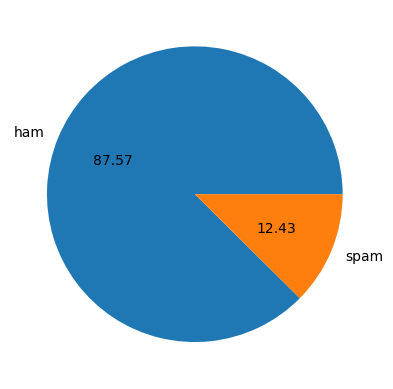

In [38]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [39]:
# Data is imbalanced

In [40]:
import nltk

In [41]:
!pip install nltk

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
df['num_characters'] = df['text'].apply(len)

In [44]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [46]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [52]:
import seaborn as sns

C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

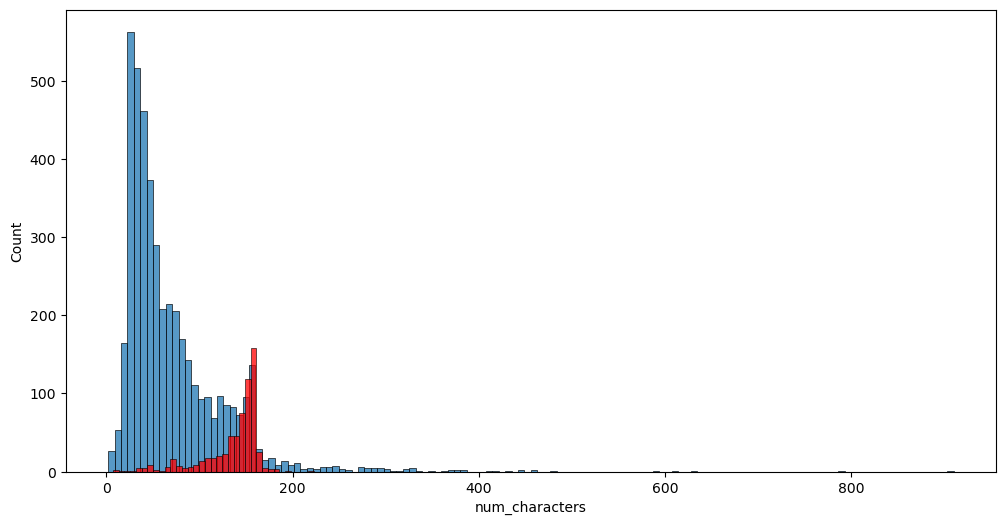

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

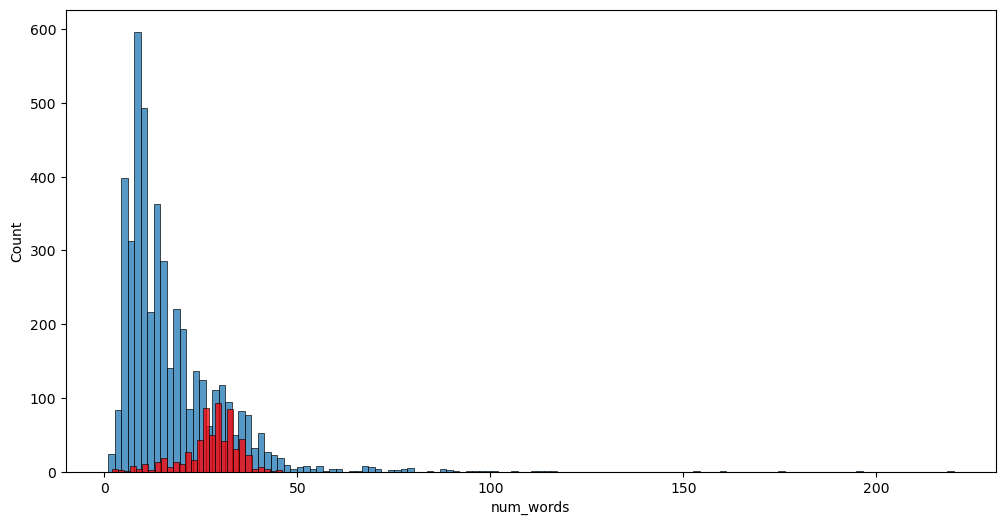

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


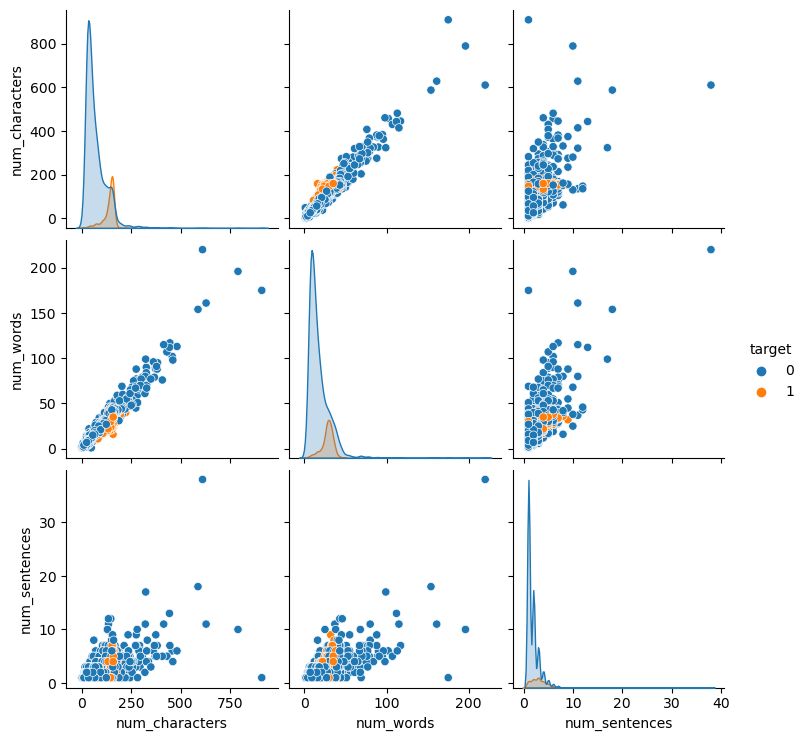

In [55]:
sns.pairplot(df,hue='target')

In [57]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

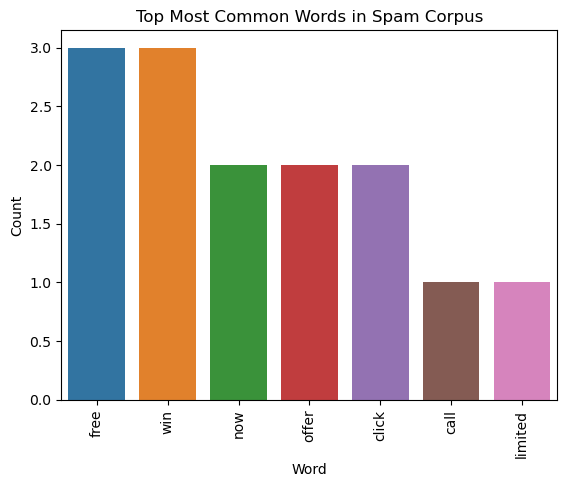

In [2]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample spam corpus (replace with your actual spam_corpus)
spam_corpus = ['free', 'win', 'call', 'now', 'offer', 'click', 'limited', 
               'win', 'free', 'offer', 'click', 'now', 'win', 'free']

# Count the frequency of words in spam_corpus
word_counts = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the counts with columns 'Word' and 'Count'
df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Create a bar plot using x='Word' and y='Count'
sns.barplot(x='Word', y='Count', data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.title('Top Most Common Words in Spam Corpus')
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [76]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ". join(y)

In [77]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [78]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

NameError: name 'ps' is not defined

In [81]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [82]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [83]:
df['transformed_text'] = df['text'].apply(transform_text)

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [85]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [86]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

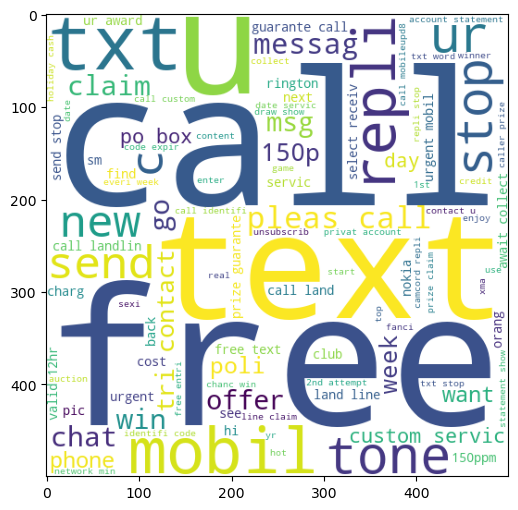

In [87]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [88]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

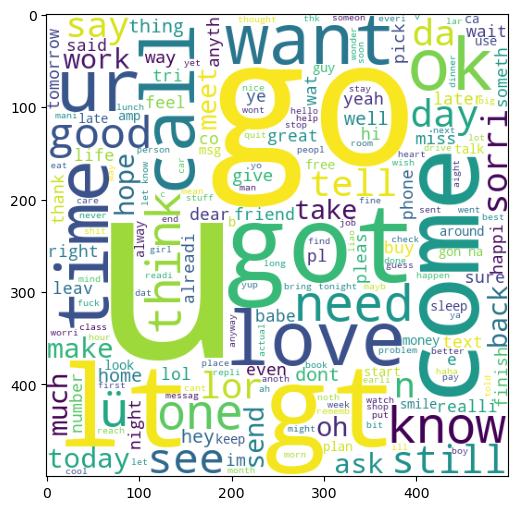

In [89]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'Model': [
        'Logistic Regression', 'Support Vector Classifier', 'Multinomial Naive Bayes',
        'K-Nearest Neighbors', 'AdaBoost Classifier', 'Bagging Classifier'
    ],
    'Baseline Accuracy': [0.952, 0.973, 0.959, 0.900, 0.962, 0.957],
    'Baseline Precision': [0.940, 0.974, 1.000, 1.000, 0.954, 0.862],
    'Accuracy with Max Features (3000)': [0.956, 0.975, 0.972, 0.905, 0.961, 0.959],
    'Precision with Max Features (3000)': [0.970, 0.975, 1.000, 1.000, 0.946, 0.869],
    'Accuracy with Scaling': [0.967, 0.972, 0.979, 0.905, 0.961, 0.959],
    'Precision with Scaling': [0.964, 0.943, 0.946, 0.976, 0.946, 0.869],
    'Accuracy with Num Characters': [0.961, 0.867, 0.940, 0.928, 0.972, 0.968],
    'Precision with Num Characters': [0.971, 0.000, 1.000, 0.771, 0.950, 0.913],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Reshape the DataFrame to long format for Seaborn
df_long = pd.melt(
    df, 
    id_vars=["Model"], 
    var_name="Metric", 
    value_name="Score"
)

# Plotting using catplot
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_long, 
    kind="bar", 
    x="Model", 
    y="Score", 
    hue="Metric", 
    height=6, 
    aspect=2,
    palette="muted"
)

# Customize plot labels and appearance
g.set_axis_labels("Machine Learning Models", "Scores")
g.set_titles("Performance Metrics for ML Models in Spam Detection")
g.set_xticklabels(rotation=45)
g.set(ylim=(0, 1.1))  # Adjust y-axis to fit precision/accuracy ranges
g.despine(left=True)

# Show the plot
plt.show()


In [90]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [92]:
len(spam_corpus)

9781

In [93]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [94]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [95]:
len(ham_corpus)

35940

In [96]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [97]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [99]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [100]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [101]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [102]:
X.shape

(5157, 3000)

In [103]:
y = df['target'].values

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [107]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [109]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [110]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [111]:
# tfidf --> MNB

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [113]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [114]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [115]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [116]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [117]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9714285714285714


In [118]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [119]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,xgb,0.972868,0.971429
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892


In [120]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [121]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.972868
3,ETC,Accuracy,0.977713
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,xgb,Accuracy,0.972868
7,AdaBoost,Accuracy,0.966085
8,LR,Accuracy,0.958333
9,BgC,Accuracy,0.961240


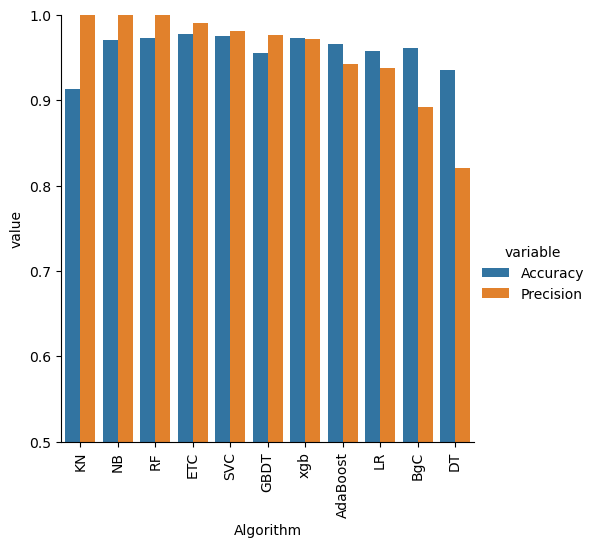

In [122]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [123]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [124]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [125]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [126]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [127]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [128]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [129]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
3,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,xgb,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429
7,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
8,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
9,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892


In [130]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [131]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [132]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [133]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [134]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [135]:
from sklearn.ensemble import StackingClassifier

In [136]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [137]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806201550387597
Precision 0.9652173913043478


In [139]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [143]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Sample training data
X_train = ["This is spam", "This is not spam", "Spam is bad", "I don't like spam"]
y_train = ['spam', 'not_spam', 'spam', 'not_spam']

# Step 1: Vectorize the training data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Step 2: Initialize the MultinomialNB model
model = MultinomialNB()

# Step 3: Fit the model with the training data (this step is crucial)
model.fit(X_train_vec, y_train)  # This step fits the model

# Check if the model was fitted correctly (debugging)
print("Model fitted with classes:", model.classes_)

# Step 4: Prepare new data (input for prediction)
new_data = ["Free money offer"]
X_new = vectorizer.transform(new_data)  # Transform new data

# Step 5: Now make the prediction (only after fitting the model)
prediction = model.predict(X_new)  # This should work after the model is fitted
print(prediction)


Model fitted with classes: ['not_spam' 'spam']
['not_spam']


In [144]:
# After fitting, check if classes were assigned (debug step)
print(model.classes_)


['not_spam' 'spam']


In [145]:
try:
    model.fit(X_train_vec, y_train)
    print("Model fitted successfully.")
except Exception as e:
    print(f"Error fitting the model: {e}")

# Now make the prediction
try:
    prediction = model.predict(X_new)
    print("Prediction:", prediction)
except Exception as e:
    print(f"Error during prediction: {e}")


Model fitted successfully.
Prediction: ['not_spam']


In [146]:
from sklearn.metrics import accuracy_score
X_test = ["I got a free coupon", "This is a spam message"]
y_test = ['not_spam', 'spam']

X_test_vec = vectorizer.transform(X_test)  # Transform test data
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [168]:
import joblib

# Fit the TfidfVectorizer during training
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)

# Save the fitted vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Train the model (e.g., Random Forest) on the transformed data
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)

# Save the trained model
joblib.dump(rfc, 'spam_model.pkl')


['spam_model.pkl']

In [169]:
import joblib

# Load the saved tfidf vectorizer and model
tfidf = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('spam_model.pkl')

# Preprocess the test message
new_message = "11111"
transformed_message = transform_text(new_message)

# Convert the transformed message into the feature format using the fitted vectorizer
transformed_message_vector = tfidf.transform([transformed_message]).toarray()

# Make prediction
prediction = model.predict(transformed_message_vector)

# Output the result
if prediction == 1:
    print("The message is: Spam")
else:
    print("The message is: Ham")


The message is: Ham


In [170]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # Assuming you are using RandomForestClassifier

# Assuming you've already trained your model and saved it in 'model'
# Also, the TfidfVectorizer should have been fitted on the training data, and you should use the same one during prediction

# Replace with the vectorizer and model you've used in training
tfidf = TfidfVectorizer(max_features=3000)  # Use the same tfidf vectorizer as used for training
model = RandomForestClassifier(n_estimators=100)  # Replace with the model you used for training

# Your training data (replace with your actual training data)
# X_train is the list of messages and y_train is the list of labels (0 for ham, 1 for spam)
X_train = ["Hello, how are you?", "Get your free prize now! Click here.", "You have won a lottery!", "Let's meet tomorrow.", "Limited time offer!"]
y_train = [0, 1, 1, 0, 1]  # 0 - Ham, 1 - Spam

# Fit the TF-IDF Vectorizer and Model
X_train_tfidf = tfidf.fit_transform(X_train)
model.fit(X_train_tfidf, y_train)

# Function to test a message (this will be used for your new input)
def test_message(model, tfidf, message):
    # Transform the message using the same vectorizer as used during training
    transformed_message = tfidf.transform([message]).toarray()

    # Make prediction using the trained model
    prediction = model.predict(transformed_message)

    # Convert the prediction result to a human-readable label
    if prediction == 0:
        return "ham"
    else:
        return "spam"

# Test the model on a new message
new_message = "Free entry in a weekly contest to win a FA Cup ticket"
result = test_message(model, tfidf, new_message)

# Print the result
print(f"The message is: {result}")


The message is: spam


In [175]:
# Test the model on a new message
new_message = "Ffffffffff. Alright no way I can meet up with you sooner?"
result = test_message(model, tfidf, new_message)
# Print the result
print(f"The message is: {result}")


The message is: spam


In [184]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Train your model (make sure you've done this earlier in your pipeline)
tfidf = TfidfVectorizer()  # Vectorizer
X_train_tfidf = tfidf.fit_transform(X_train)  # Transform the training data
model = MultinomialNB()  # Naive Bayes model
model.fit(X_train_tfidf, y_train)  # Fit the model with training data

# Save the model and vectorizer to files
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


In [185]:
import pickle

# Load the trained model and vectorizer
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

# Check if the model is fitted
try:
    # Test with a new message
    test_message = "ggudgfuduufgd"
    test_message_transformed = [test_message.lower()]  # Transform the message
    test_message_tfidf = tfidf.transform(test_message_transformed).toarray()  # TF-IDF transformation
    
    # Predict using the model
    prediction = model.predict(test_message_tfidf)
    
    # Output the result
    if prediction == 1:
        print("The message is Spam.")
    else:
        print("The message is Ham.")
except Exception as e:
    print(f"Error occurred: {e}")


The message is Spam.


In [191]:
import pickle

# Load the pre-trained model and vectorizer from disk
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf = pickle.load(vectorizer_file)

# Function to predict if a message is spam or ham
def predict_spam(message):
    # Preprocess the message (e.g., convert to lower case)
    test_message_transformed = [message.lower()]
    
    # Transform the message using the loaded TF-IDF vectorizer
    test_message_tfidf = tfidf.transform(test_message_transformed).toarray()
    
    # Predict the class (1 = spam, 0 = ham)
    prediction = model.predict(test_message_tfidf)
    
    if prediction == 1:
        return "Spam"
    else:
        return "Ham"

# Test the function with a new message
test_message = "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
result = predict_spam(test_message)
print(f"The message is: {result}")

#The code works by first loading the pre-trained model and TF-IDF vectorizer from disk using `pickle`. 
#It then preprocesses the test message by converting it to lowercase to ensure case insensitivity. 
#After that, the message is transformed into a numerical format using the loaded TF-IDF vectorizer, which represents the importance of each word in the message. 
#The transformed message is passed to the trained model to predict whether it's spam or ham (non-spam). The model outputs a class (1 for spam, 0 for ham), and based on this, the code prints whether the message is "Spam" or "Ham".
#This entire process allows you to classify any given message based on the patterns the model has learned during its training.



The message is: Spam
